Import file

In [15]:
import glob2

In [17]:
filenames = glob2.glob('*.txt')

with open('outfile.txt', 'w') as f:
  for file in filenames:
    with open(file) as infile:
      f.write(infile.read()+'\n')

Import library untuk menampilkan pesan log proses

In [18]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Import library gensim dan package yang dibutuhkan

Class MyCorpus bertujuan untuk memproses data teks yang akan digunakan sebagai sumber data latih membuat model word2vec.

In [19]:
from gensim import utils

class MyCorpus(object): 
    """An interator that yields sentences (lists of str)."""

    def __iter__(self):
        corpus_path = 'outfile.txt' # sesuaikan dengan path masing-masing
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            # asumsi 1 dokumen adalah 1 kalimat, dituliskan per baris. Antar token dipisahkan dengan spasi
            yield utils.simple_preprocess(line)

Import package untuk membangun model


In [20]:
import gensim.models

Eksperimen pertama jumlah minimal kemunculan kata = 1

In [21]:
sentences = MyCorpus()
model1 = gensim.models.Word2Vec(sentences=sentences,min_count=1)

2020-10-08 15:36:40,646 : INFO : collecting all words and their counts
2020-10-08 15:36:40,648 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-08 15:36:40,711 : INFO : collected 5811 word types from a corpus of 48930 raw words and 1952 sentences
2020-10-08 15:36:40,712 : INFO : Loading a fresh vocabulary
2020-10-08 15:36:40,723 : INFO : effective_min_count=1 retains 5811 unique words (100% of original 5811, drops 0)
2020-10-08 15:36:40,724 : INFO : effective_min_count=1 leaves 48930 word corpus (100% of original 48930, drops 0)
2020-10-08 15:36:40,745 : INFO : deleting the raw counts dictionary of 5811 items
2020-10-08 15:36:40,746 : INFO : sample=0.001 downsamples 55 most-common words
2020-10-08 15:36:40,746 : INFO : downsampling leaves estimated 41842 word corpus (85.5% of prior 48930)
2020-10-08 15:36:40,757 : INFO : estimated required memory for 5811 words and 100 dimensions: 7554300 bytes
2020-10-08 15:36:40,760 : INFO : resetting layer weights
2

Eksperimen kedua jumlah minimal kemunculan kata = 5

In [22]:
sentences = MyCorpus()
model2 = gensim.models.Word2Vec(sentences=sentences,min_count=5)

2020-10-08 15:36:47,498 : INFO : collecting all words and their counts
2020-10-08 15:36:47,499 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-10-08 15:36:47,558 : INFO : collected 5811 word types from a corpus of 48930 raw words and 1952 sentences
2020-10-08 15:36:47,558 : INFO : Loading a fresh vocabulary
2020-10-08 15:36:47,563 : INFO : effective_min_count=5 retains 1519 unique words (26% of original 5811, drops 4292)
2020-10-08 15:36:47,563 : INFO : effective_min_count=5 leaves 41831 word corpus (85% of original 48930, drops 7099)
2020-10-08 15:36:47,570 : INFO : deleting the raw counts dictionary of 5811 items
2020-10-08 15:36:47,571 : INFO : sample=0.001 downsamples 64 most-common words
2020-10-08 15:36:47,571 : INFO : downsampling leaves estimated 33826 word corpus (80.9% of prior 41831)
2020-10-08 15:36:47,575 : INFO : estimated required memory for 1519 words and 100 dimensions: 1974700 bytes
2020-10-08 15:36:47,576 : INFO : resetting layer weigh

Akses model dan melihat vektor setiap kata positif.
Ekperimen pertama

In [25]:
vec_positif = model1.wv['positif']
print(vec_positif)

[ 0.2643273  -0.02018008  0.2927866   0.26589528 -0.24046718  0.31888235
 -0.24694608 -0.10502183  0.06007788 -0.34779814 -0.2525005  -0.06129825
  0.03710632 -0.3205446   0.01223338  0.04378909  0.09995209 -0.46245414
  0.02701215 -0.13566346  0.17411701 -0.06477938  0.29417282 -0.1353619
 -0.20966053 -0.11380055  0.14805199  0.14016694  0.11817494  0.09039464
 -0.24004452 -0.07161039  0.2933003   0.33012596 -0.20105082 -0.11965646
  0.15961185 -0.04779326  0.16061926  0.2791371   0.31682038  0.21289411
  0.3690709   0.22968629  0.11114264 -0.08621486 -0.12119205 -0.24515598
 -0.06083864  0.2997194   0.10267104  0.0845878   0.20851906  0.01523384
 -0.04275879 -0.25925007  0.01879486 -0.11153363  0.11299734 -0.39107126
  0.24290295 -0.44363394  0.31571487 -0.11587486 -0.01759933 -0.04659766
  0.44921187  0.25504205 -0.4127627   0.206299   -0.0417185   0.06590449
 -0.48142484 -0.20922674  0.01095175  0.03880464  0.00100735 -0.03181808
  0.20507878 -0.1779736   0.16878593 -0.05374381  0.

Akses model dan melihat vektor setiap kata positif.
Ekperimen kedua

In [26]:
vec_positif = model2.wv['positif']
print(vec_positif)

[ 0.29834676 -0.07014777  0.35263544  0.27247936 -0.21128933  0.28507486
 -0.38533863 -0.0836245  -0.00083314 -0.42053813 -0.231406   -0.15973766
  0.03796789 -0.3533945  -0.08137529  0.02723962  0.2377776  -0.4087182
 -0.03058796 -0.21595106  0.20819566  0.06216657  0.4371839  -0.24723999
 -0.20060137  0.00951186  0.20021328  0.09989154  0.07790279  0.11626556
 -0.27074477 -0.08120499  0.20165986  0.3065239  -0.13322358 -0.13992842
  0.14601164 -0.0201137   0.18199459  0.300047    0.34516835  0.24539433
  0.45368093  0.22798198  0.15097797 -0.16433707 -0.09434961 -0.26554748
 -0.09795679  0.23788506  0.07080473  0.1033811   0.16998371  0.00120254
 -0.07780492 -0.28774124 -0.05278584 -0.06875164  0.11233985 -0.29343742
  0.36082235 -0.527383    0.26554525 -0.21156678 -0.09777902 -0.01498985
  0.42510355  0.2609504  -0.35342905  0.28651547 -0.10064887  0.10858433
 -0.43987504 -0.12435291  0.04502799  0.01639827 -0.0092419  -0.03793256
  0.30124682 -0.24721062  0.17762046 -0.17120486  0.

Tes nilai similarity antar kata kata model pertama

In [56]:
print(model1.wv.similarity('mobil', 'kendaraan'))
print(model1.wv.similarity('tinggal', 'rumah'))
print(model1.wv.similarity('sepeda', 'buruk'))

0.9983942
0.99767834
0.99426967


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Tes nilai similarity antar kata kata model kedua

In [57]:
print(model2.wv.similarity('mobil', 'kendaraan'))
print(model2.wv.similarity('tinggal', 'rumah'))
print(model2.wv.similarity('sepeda', 'buruk'))

0.998987
0.9964032
0.9945999


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Memeriksa 5 kata yang similarity-nya paling tinggi dengan sebuah kata model pertama. 

In [59]:
print(model1.wv.most_similar(positive=['sepeda'], topn=5))

[('seperti', 0.9999665021896362), ('kita', 0.9999576807022095), ('kata', 0.9999561309814453), ('bersepeda', 0.9999557733535767), ('kami', 0.9999557733535767)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Memeriksa 5 kata yang similarity-nya paling tinggi dengan sebuah kata model kedua. 

In [60]:
print(model2.wv.most_similar(positive=['sepeda'], topn=5))

[('bersepeda', 0.9999101758003235), ('seperti', 0.9999098777770996), ('saya', 0.999907374382019), ('kata', 0.9999045729637146), ('kita', 0.9999033212661743)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Import library yang diperlukan untuk visualisasi embeddings

In [61]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling

Fungsi untuk reduksi dimensi, dimensi vektor direduksi menjadi 2.

In [62]:
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


Proses reduksi dimensi

In [63]:
x_vals1, y_vals1, labels1 = reduce_dimensions(model1)
x_vals2, y_vals2, labels2 = reduce_dimensions(model2)

Fungsi untuk visualisasi dengan matplotlib

In [72]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


Tes plot dengan matplotlib model pertama

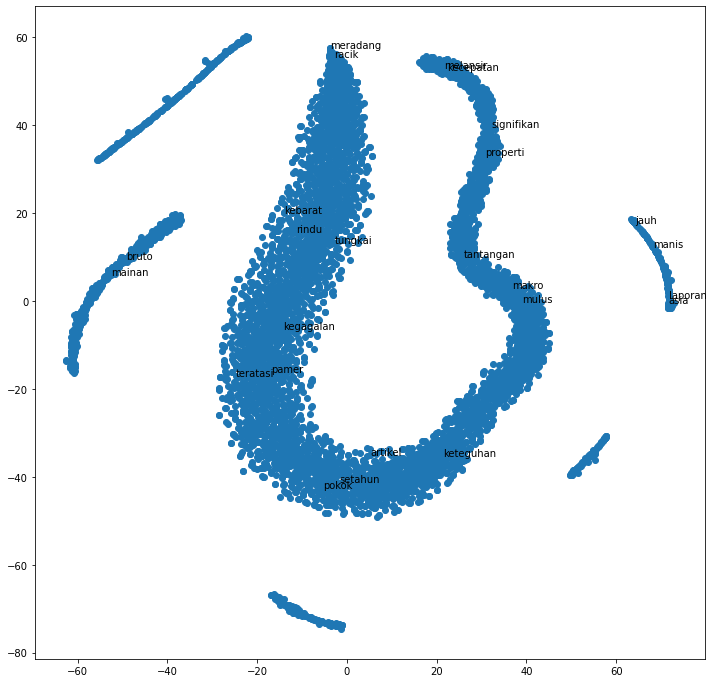

In [73]:
plot_with_matplotlib(x_vals1, y_vals1, labels1)

Tes plot dengan matplotlib model kedua

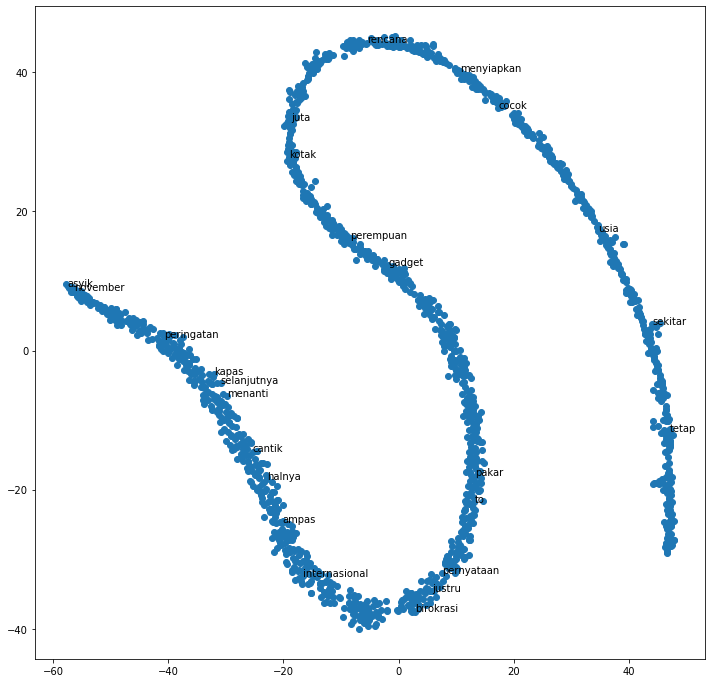

In [74]:
plot_with_matplotlib(x_vals2, y_vals2, labels2)